In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('supply_chain_data.csv')
df.shape

(100, 24)

In [11]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [12]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [14]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows: ", df.duplicated().sum())

Missing Values:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64
Duplicate Rows:  0


In [15]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object


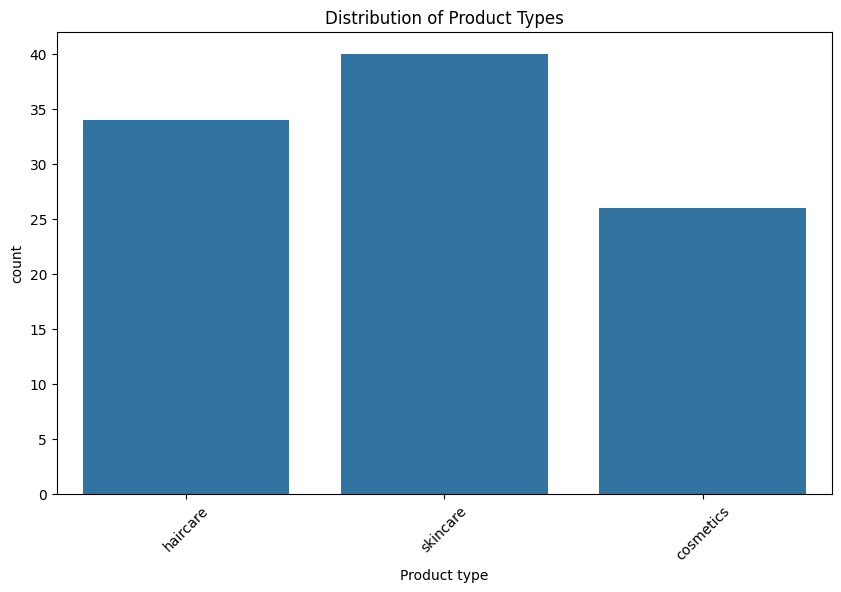

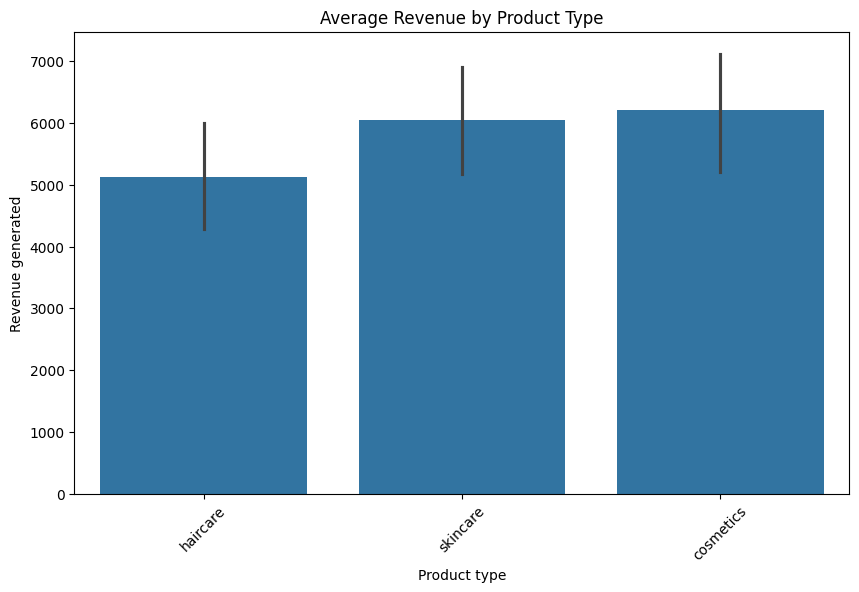

In [16]:
# Product type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product type')
plt.title('Distribution of Product Types')
plt.xticks(rotation=45)
plt.show()

# Average revenue by product type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Product type', y='Revenue generated')
plt.title('Average Revenue by Product Type')
plt.xticks(rotation=45)
plt.show()

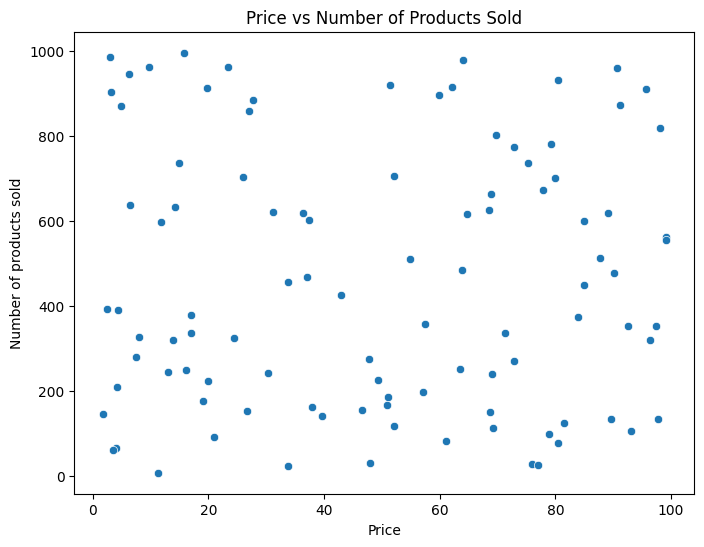

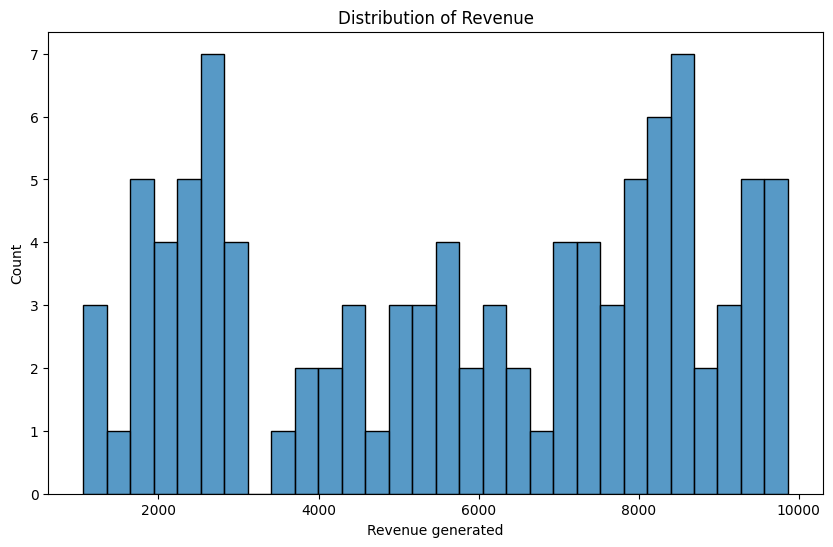

In [17]:
# Correlation between price and number of products sold
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Number of products sold')
plt.title('Price vs Number of Products Sold')
plt.show()

# Distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Revenue generated', bins=30)
plt.title('Distribution of Revenue')
plt.show()

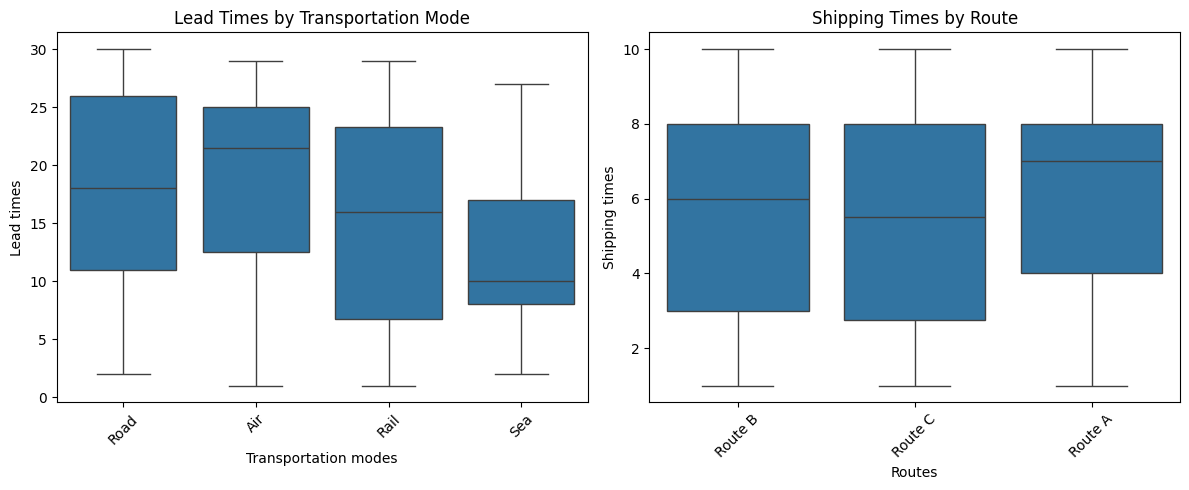

In [18]:
# Lead times analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Transportation modes', y='Lead times')
plt.title('Lead Times by Transportation Mode')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Routes', y='Shipping times')
plt.title('Shipping Times by Route')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

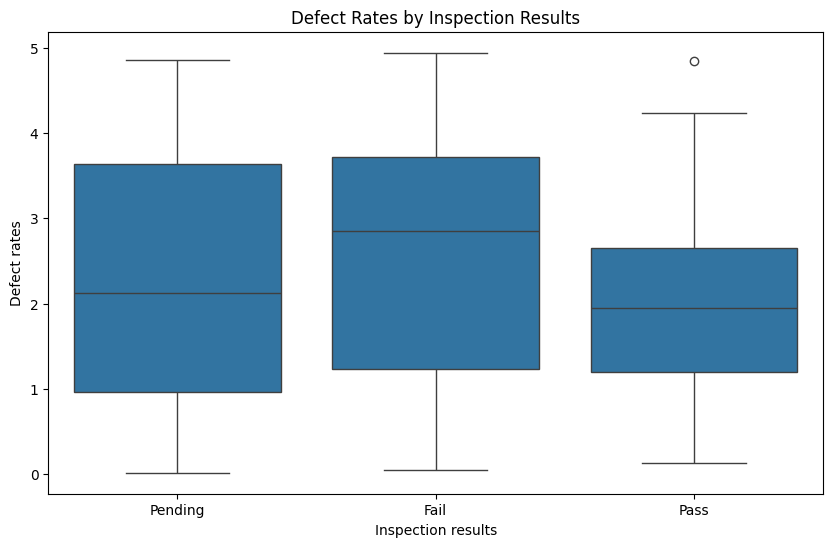

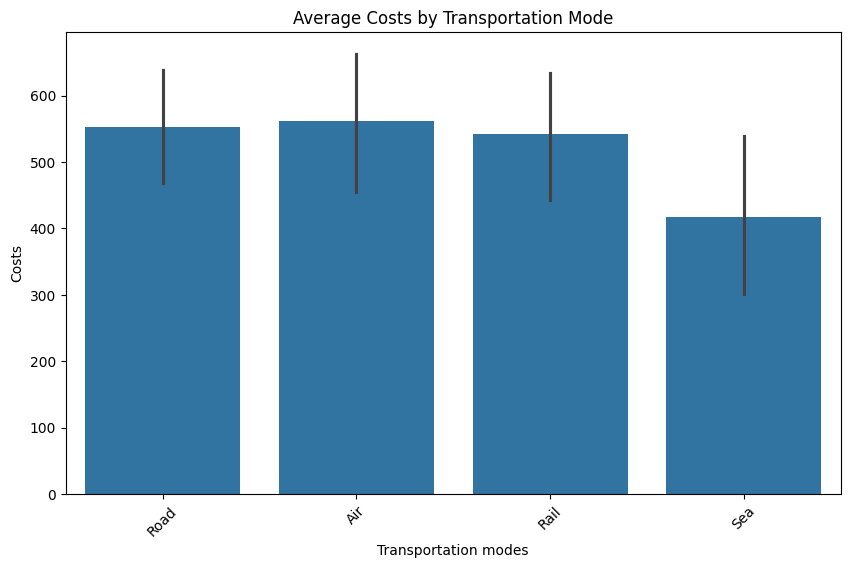

In [19]:
# Defect rates by inspection results
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Inspection results', y='Defect rates')
plt.title('Defect Rates by Inspection Results')
plt.show()

# Cost analysis by transportation mode
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Transportation modes', y='Costs')
plt.title('Average Costs by Transportation Mode')
plt.xticks(rotation=45)
plt.show()

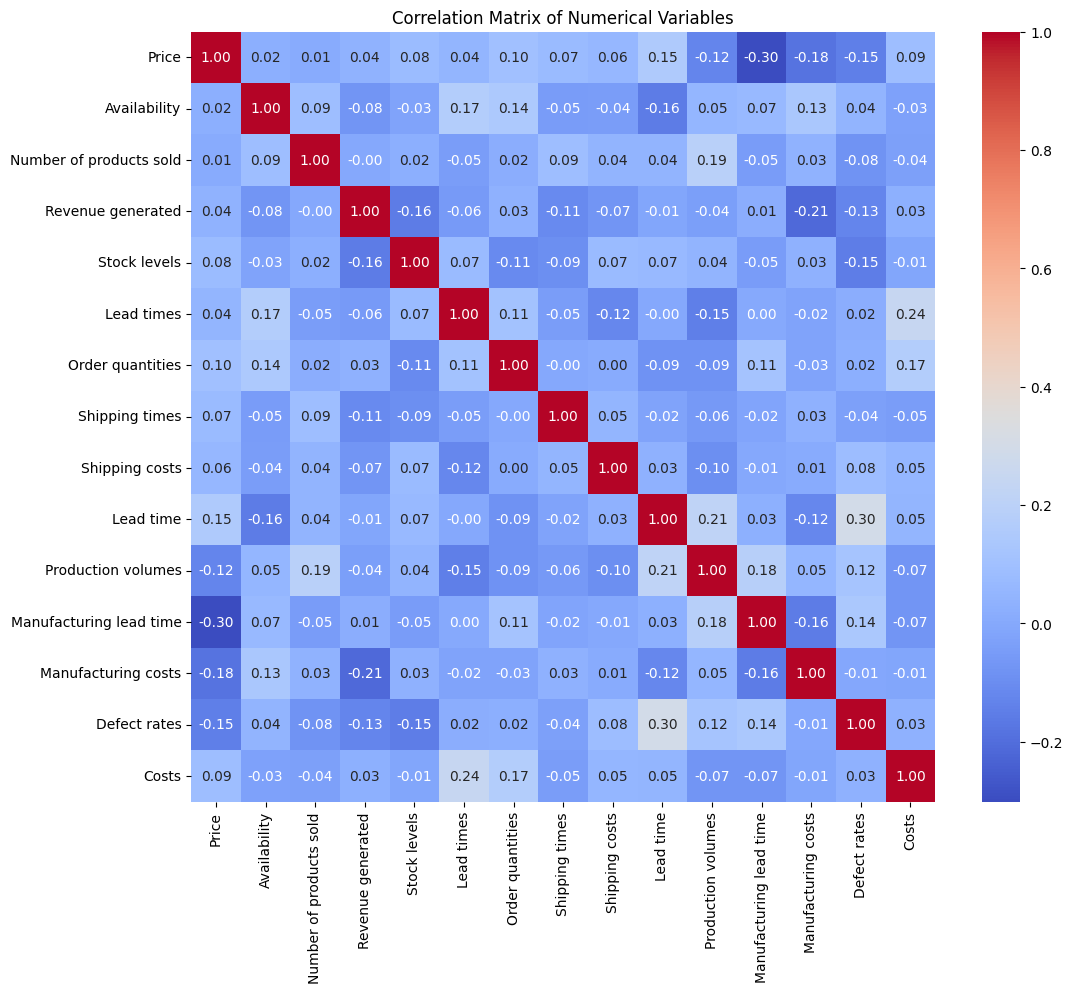

In [20]:
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [21]:
# Key metrics summary
print("Key Supply Chain Metrics:\n")
print(f"Average Revenue: ${df['Revenue generated'].mean():.2f}")
print(f"Average Lead Time: {df['Lead times'].mean():.2f} days")
print(f"Average Defect Rate: {df['Defect rates'].mean():.2f}%")
print(f"Most Common Transportation Mode: {df['Transportation modes'].mode()[0]}")
print(f"Most Common Route: {df['Routes'].mode()[0]}")
print(f"Average Shipping Cost: ${df['Shipping costs'].mean():.2f}")

Key Supply Chain Metrics:

Average Revenue: $5776.05
Average Lead Time: 15.96 days
Average Defect Rate: 2.28%
Most Common Transportation Mode: Road
Most Common Route: Route A
Average Shipping Cost: $5.55
